# Swiss bank notes

## Description


Six variables ont été mesurées sur 200 billets de banque de mille francs Suisse, dont 100 étaient des vrais billets et 100 des faux billets. Cette étude a été extraite du livre de Flury and Riedwyl (_B. Flury and H. Riedwyl. Multivariate Statistics. Cambridge University Press, 1988. 1.1_)

X1|length|Length of the bank note
--------|------|-----
X2|height.left|Height of the bank note, measured on the left
X3|height.right|Height of the bank note, measured on the right
X4|distance.lower|Distance of inner frame to the lower border
X5|distance.upper|Distance of inner frame to the upper border
X6|diagonal|Length of the diagonal


Le fichier texte `swiss-bank-notes.csv` contient en première ligne, le nom des variables. Les 100 premières lignes de données correspondent aux vrais billets, les 100 dernières correspondent aux faux billets.

## Travaux préliminaires

1. Importer les données
2. 1. Quelle est la longueur de la digonale du 101 ème billet ?
   2. Extraire la sous table des billets corespondant aux lignes 10,30,60 et 120.
   3. Extraire la sous table de la troisième à la sixième colonne.
   4. Extraire la sous table des billets correspondants aux lignes 25 à 30 et aux colonnes `Height.left`, `Diagonal` et `type`.
3. Tracer la variable `InnerFrameUpper` en fonction de `Diagonal` en utilisant des points de couleurs bleu pour les vrais billets et rouge pour les faux billets. La corrélation est-semble-t-elle importante ?
4. Est-il nécessaire de centrer et réduire les données ? Justifier.


## Classification

Utiliser les documents du cours `kmeans-python.ipynb` et `cah-python.ipynb` pour répondre aux quextions suivantes :
1. Appliquer l'algorithme des moyennes mobiles à ce jeu de données. 
2. En utilisant l'inertie, quel semble être le nombre de classes le plus adéquat ? Est-ce normal ?
3. Procéder à une classification ascendante hierarchique puis représenter le dendogramme. Led nombre de classe suggérer par le dendogramme est-il le même qu'avec le k-means.
4. Ces deux méthodes de classification semblent-elles efficaces au vue de la nature du jeu de données ? 

In [25]:
import pandas as pd

# Charger les données à partir du fichier CSV
data = pd.read_csv('swiss-bank-notes.csv', sep=';')

# Afficher les premières lignes pour vérification
data.head()

,Length,HeightLeft,HeightRight,InnerFrameLow,InnerFrameUpper,Diagonal,Type
0,"214,8",131,"131,1",9,"9,7",141,1
1,"214,6","129,7","129,7","8,1","9,5","141,7",1
2,"214,8","129,7","129,7","8,7","9,6","142,2",1
3,"214,8","129,7","129,6","7,5","10,4",142,1
4,215,"129,6","129,7","10,4","7,7","141,8",1


## Question 2.1
Quelle est la longueur de la digonale du 101 ème billet ?


In [26]:
longueur_diagonale_101 = data.iloc[100]['Diagonal']
print("Longueur de la diagonale du 101ème billet:", longueur_diagonale_101)


Longueur de la diagonale du 101ème billet: 139,8


## Question 2.2
Extraire la sous table des billets corespondant aux lignes 10,30,60 et 120.

In [27]:
billets_specifiques = data.iloc[[9, 29, 59, 119]]
print("Sous-table des billets spécifiques:\n", billets_specifiques)


Sous-table des billets spécifiques:
     Length HeightLeft HeightRight InnerFrameLow InnerFrameUpper Diagonal  Type
9    215,2      130,4       130,3           9,2              10    140,7     1
29   214,8      129,7       129,3           8,3               9      142     1
59   215,1        130       129,8           8,2            10,3    141,4     1
119  214,4      130,2       129,9          10,1              12    139,2     0


## Question 2.3

Extraire la sous table de la troisième à la sixième colonne.

In [28]:
sous_table_colonnes_3_6 = data.iloc[:, 2:6]
print("Sous-table des colonnes 3 à 6:\n", sous_table_colonnes_3_6)


Sous-table des colonnes 3 à 6:
     HeightRight InnerFrameLow InnerFrameUpper Diagonal
0         131,1             9             9,7      141
1         129,7           8,1             9,5    141,7
2         129,7           8,7             9,6    142,2
3         129,6           7,5            10,4      142
4         129,7          10,4             7,7    141,8
..          ...           ...             ...      ...
195       130,3           9,9            12,1    139,6
196       129,9          10,3            11,5    139,7
197       130,4          10,6            11,1      140
198       130,8          11,2            11,2    139,4
199       129,9          10,2            11,5    139,6

[200 rows x 4 columns]


## Question 2.4

Extraire la sous table des billets correspondants aux lignes 25 à 30 et aux colonnes `Height.left`, `Diagonal` et `type`.

In [29]:
sous_table_25_30_et_colonnes = data.loc[24:29, ['HeightLeft', 'Diagonal', 'Type']]
print("Sous-table des billets 25 à 30 et colonnes spécifiques:\n", sous_table_25_30_et_colonnes)


Sous-table des billets 25 à 30 et colonnes spécifiques:
    HeightLeft Diagonal  Type
24      129,7    141,1     1
25      130,4    142,3     1
26      130,2    142,4     1
27      130,3    141,9     1
28        130    141,8     1
29      129,7      142     1


## Question 3

Tracer la variable `InnerFrameUpper` en fonction de `Diagonal` en utilisant des points de couleurs bleu pour les vrais billets et rouge pour les faux billets. La corrélation est-semble-t-elle importante ?

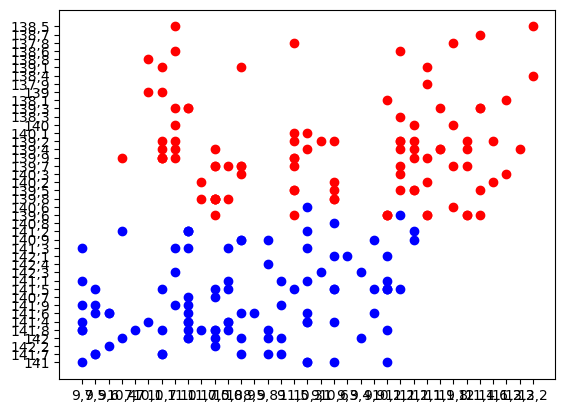

In [30]:
## Question 3

# Tracer la variable `InnerFrameUpper` en fonction de `Diagonal` en utilisant des points de couleurs bleu pour les vrais billets et rouge pour les faux billets. La corrélation est-semble-t-elle importante ?

import matplotlib.pyplot as plt

plt.scatter(data.iloc[0:100, 4], data.iloc[0:100, 5], color='blue')
plt.scatter(data.iloc[100:200, 4], data.iloc[100:200, 5], color='red')
plt.show()

## Question 4

Est-il nécessaire de centrer et réduire les données ? Justifier.

Oui, car les variables ont des ordres de grandeur différents.
